# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-9 | Date: Apr 05, 2024

# Part-1: FasterRCNN

In this Lab/Tutorial session, you will learn how to train an object detection model for a custom dataset and evaluate its performance on a test dataset.

In this lab, you will focus on the configuration of the Faster R-CNN object detector for a custom dataset.

Let's get started!

## Tutorial:

1. Image annotation using CVAT: Computer Vision Annotation Tool
   (Reference: https://cvat.ai)
2. Creation of the custom YAML file for dataset
3. Training the model
4. Using the trained model for inference

## Tasks for this week:

1. Clone the Repository
2. Install libraries and download the dataset
3. Train the model using transfer learning from already trained models
4. Use a trained model for inference

## Clone the Repository

In [1]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

fatal: destination path 'ObjectDetection-FasterRCNN' already exists and is not an empty directory.


In [3]:
# Enter the repo directory.
%cd ObjectDetection-FasterRCNN/

[Errno 2] No such file or directory: 'ObjectDetection-FasterRCNN/'
/content/ObjectDetection-FasterRCNN


In [4]:
# Install the Requirements
!pip install -r requirements.txt

## Download the Dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cd content/ObjectDetection-FasterRCNN
# Change the below path based on your Gdrive folder path.
!unzip /content/drive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week9/FasterRCNN/data.zip

/bin/bash: line 1: cd: content/ObjectDetection-FasterRCNN: No such file or directory
Archive:  /content/drive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week9/FasterRCNN/data.zip
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/images/
  inflating: __MACOSX/data/._images  
  inflating: data/.gitignore         
  inflating: __MACOSX/data/._.gitignore  
   creating: data/images/valid/
  inflating: __MACOSX/data/images/._valid  
  inflating: data/images/.DS_Store   
  inflating: __MACOSX/data/images/._.DS_Store  
   creating: data/images/train/
  inflating: __MACOSX/data/images/._train  
  inflating: data/images/valid/15.xml  
  inflating: __MACOSX/data/images/valid/._15.xml  
  inflating: data/images/valid/15.jpg  
  inflating: __MACOSX/data/images/valid/._15.jpg  
  inflating: data/images/valid/10.xml  
  inflating: __MACOSX/data/images/valid/._10.xml  
  inflating: data/images/valid/10.jpg  
  inflating: __MACOS

## Create the Custom Dataset YAML File.

In [7]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'data/images/train'
TRAIN_DIR_LABELS: 'data/images/train'
VALID_DIR_IMAGES: 'data/images/valid'
VALID_DIR_LABELS: 'data/images/valid'

# Class names.
CLASSES: [
    '__background__',
    'date',
    'fig',
    'hazelnut'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 4

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

In [16]:
!wandb disabled

W&B disabled.


In [9]:
!python train.py --config data_configs/custom_data.yaml --epochs 25 --model fasterrcnn_resnet50_fpn_v2 --project-name dryfruits --batch-size 2 --no-mosaic

Not using distributed mode
device cuda
2024-04-05 09:22:26.367945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 09:22:26.368016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 09:22:26.369873: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-05 09:22:26.381233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 09:

## Visualize Validation Results

In [10]:
import matplotlib.pyplot as plt
import glob as glob

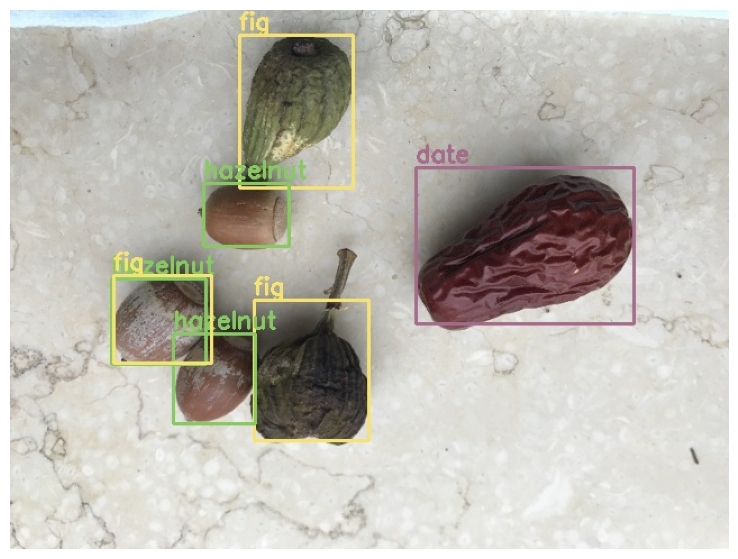

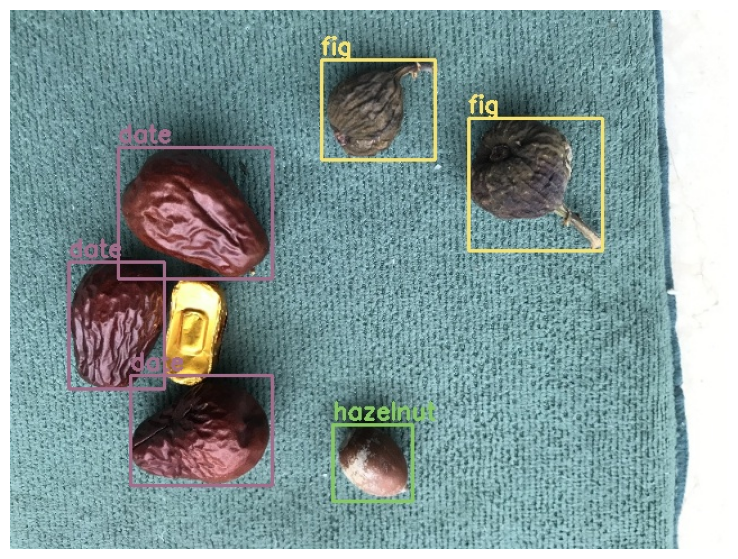

In [11]:
results_dir_path = '/content/ObjectDetection-FasterRCNN/outputs/training/dryfruits'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation

In [12]:
# No verbose mAP.
!python eval.py --weights outputs/training/dryfruits/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.29s/it]


{'classes': tensor([1, 2, 3], dtype=torch.int32),
 'map': tensor(0.8302),
 'map_50': tensor(1.),
 'map_75': tensor(0.8762),
 'map_large': tensor(0.8015),
 'map_medium': tensor(0.8752),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.4167),
 'mar_10': tensor(0.8500),
 'mar_100': tensor(0.8500),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.8292),
 'mar_medium': tensor(0.8750),
 'mar_small': tensor(-1.)}


In [13]:
# Verbose mAP.
!python eval.py --weights outputs/training/dryfruits/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.28s/it]


{'classes': tensor([1, 2, 3], dtype=torch.int32),
 'map': tensor(0.8302),
 'map_50': tensor(1.),
 'map_75': tensor(0.8762),
 'map_large': tensor(0.8015),
 'map_medium': tensor(0.8752),
 'map_per_class': tensor([0.9257, 0.7144, 0.8505]),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.4167),
 'mar_10': tensor(0.8500),
 'mar_100': tensor(0.8500),
 'mar_100_per_class': tensor([0.9250, 0.7750, 0.8500]),
 'mar_large': tensor(0.8292),
 'mar_medium': tensor(0.8750),
 'mar_small': tensor(-1.)}


## Interference

#### Inference Code:
input image: `data/images/...` - this is the path to the image \\
path to weights: `outputs/training/proj_name/best_model.pth` \\


How to use:
`!python inference.py --input #path/to/image --weights #path/to/weights`


In [14]:
!python inference.py --input data/images/train/12.jpg --weights outputs/training/dryfruits/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.356


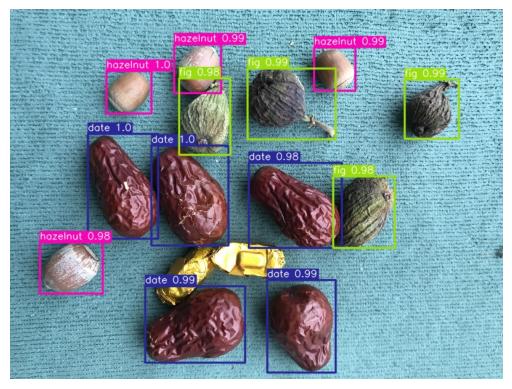

In [15]:
image = plt.imread('outputs/inference/res_1/12.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()